- We will use a dataset for binary classification which gives us an idea if sonar signal detect a rock or a mine.
- You can download it here: https://datahub.io/machine-learning/sonar#resource-sonar_zip

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("sonar_csv.csv",header =None)
#The file has no header so we have generate header with pandas

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [5]:
#Preprocessing & Exploration
df.shape

(208, 61)

In [6]:
#detecting null values
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [7]:
#output

df[60].value_counts()
#60 is the last value that contains 111 mine and 97 rock

Mine    111
Rock     97
Name: 60, dtype: int64

X & y

In [8]:
X = df.drop(60,axis=1)
y = df[60]

In [9]:
y.head()

0    Rock
1    Rock
2    Rock
3    Rock
4    Rock
Name: 60, dtype: object

In [10]:
#We need to convert y into 1 and 0

In [11]:
#We will create dummies and drop the first one because we need only one
y = pd.get_dummies(y,drop_first=True)
y.sample(5)

,Rock
98,0
61,1
176,0
21,1
169,0


In [12]:
#Training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =1)

In [13]:
import tensorflow as tf

In [14]:
from tensorflow import keras

In [39]:
model = keras.Sequential([
    keras.layers.Dense(60,input_dim=60,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
model.fit(X_train, y_train, epochs=100, batch_size=8)
#In each iteration I feed 8 sample and calculate the error and do the same thing again

Epoch 1/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6813 - accuracy: 0.5448
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6631 - accuracy: 0.5448
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6466 - accuracy: 0.5655
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6319 - accuracy: 0.6759
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6126 - accuracy: 0.6621
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5814 - accuracy: 0.7172
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5663 - accuracy: 0.7241
Epoch 8/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy: 0.8069
Epoch 9/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5109 - accuracy: 0.7655
Epoch 10/100
19/19 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.7931
Epoch 11/

In [42]:
#100% it's too good right ?

In [43]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.8103 - accuracy: 0.7937


[0.8103241324424744, 0.7936508059501648]

In [44]:
#79% on testing

Let's make prediction and see how it's goes

In [45]:
#We will predict the first 5 values of X_test
y_pred = model.predict(X_test) 
print(y_pred[:5])

2/2 [==============================] - 0s 2ms/step
[[8.8504326e-10]
 [8.8092691e-01]
 [9.7844338e-01]
 [1.0103087e-07]
 [9.9987936e-01]]


In [46]:
#We will predict the first 5 values of X_test
y_pred = model.predict(X_test).reshape(-1) #To have everything in the same dimension
print(y_pred[:5])

2/2 [==============================] - 0s 3ms/step
[8.8504326e-10 8.8092691e-01 9.7844338e-01 1.0103087e-07 9.9987936e-01]


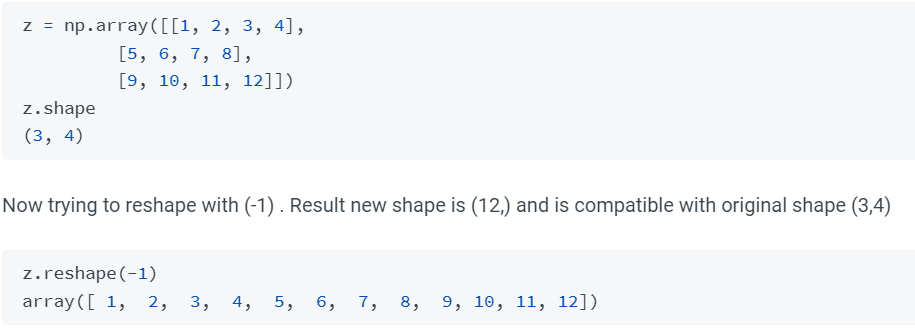

In [47]:
#Now we need to round the value for easy reading

In [48]:
y_pred = np.round(y_pred)
print(y_pred[:5])

[0. 1. 1. 0. 1.]


In [49]:
y_test[:5]

,Rock
186,0
155,0
165,0
200,0
58,1


fail a lot :) 2/5

Classification report

In [50]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        32
           1       0.85      0.71      0.77        31

    accuracy                           0.79        63
   macro avg       0.80      0.79      0.79        63
weighted avg       0.80      0.79      0.79        63



Dropout

In [60]:
modeld = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dropout(0.50), #drop 50%
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.50), #drop 50%
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.50), #drop 50%
    keras.layers.Dense(1, activation='sigmoid')
])

modeld.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modeld.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
19/19 [==============================] - 1s 5ms/step - loss: 0.7287 - accuracy: 0.5103
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 0.7654 - accuracy: 0.4828
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.7111 - accuracy: 0.5517
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.7176 - accuracy: 0.5241
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.5793
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6711 - accuracy: 0.6207
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6812 - accuracy: 0.6276
Epoch 8/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6764 - accuracy: 0.5241
Epoch 9/100
19/19 [==============================] - 0s 4ms/step - loss: 0.7005 - accuracy: 0.5586
Epoch 10/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6825 - accuracy: 0.5655
Epoch 11/

In [61]:
#Training set accuracy is lower 88% vs 100%
modeld.evaluate(X_test,y_test)
#But here we got better precision in testing (82% vs 79%)

2/2 [==============================] - 0s 4ms/step - loss: 0.4342 - accuracy: 0.8254


[0.4341733455657959, 0.8253968358039856]

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        32
           1       0.85      0.71      0.77        31

    accuracy                           0.79        63
   macro avg       0.80      0.79      0.79        63
weighted avg       0.80      0.79      0.79        63

